In [28]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('D:Internship Data Analyst Apr 2025/Day7/sales_data.csv',encoding='latin1')

# Rename the Columns what we want  
df = df.rename(columns={'QUANTITYORDERED':'Quantity','SALES':'Sales',
                       'ORDERNUMBER':'Order_No','PRICEEACH':'Price',
                       })
df.head() 

,Order_No,Quantity,Price,ORDERLINENUMBER,Sales,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [44]:
#sql query to get total quanitity and total revenue by product 
# Save as SQLite DB file
conn = sqlite3.connect('sales_data') 
df.to_sql('sales_data', conn, index=False, if_exists='replace')
query="""
     SELECT 
            Order_No,
            SUM(Quantity) as Total_Quantity,
            SUM(Quantity * Price) as Total_Revenue 
     FROM sales_data 
     GROUP BY Order_No 
     ORDER BY Total_Revenue DESC 
     LIMIT 10; 
   """

#Execute query and Load into data frame
summary_df = pd.read_sql_query(query, conn)

#Print Result
print("Top 10 Product Total_Revenue")
print(summary_df)

Top 10 Product Total_Revenue
   Order_No  Total_Quantity  Total_Revenue
0     10222             717       58018.57
1     10165             670       57334.56
2     10168             642       55176.87
3     10212             612       54145.94
4     10310             619       53162.19
5     10126             617       52927.75
6     10287             595       52926.07
7     10204             619       52724.55
8     10106             675       52286.77
9     10386             650       51380.58


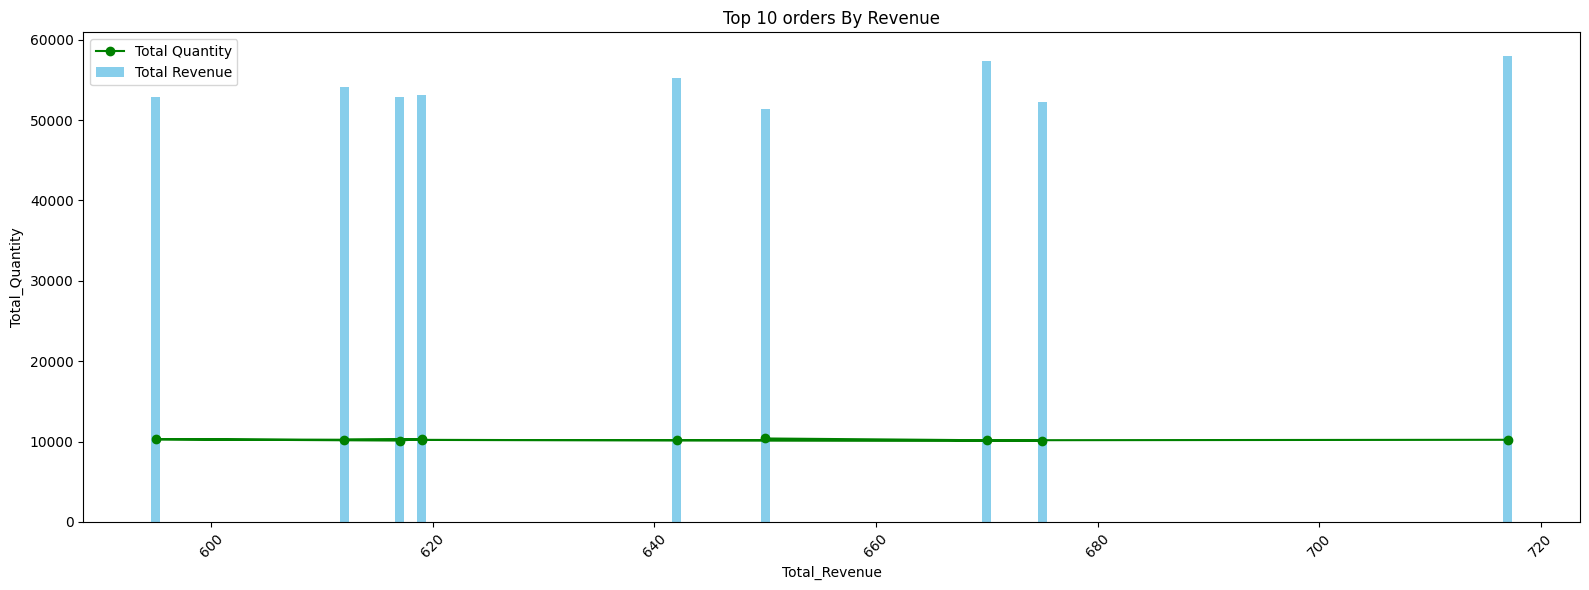

<Figure size 640x480 with 0 Axes>

In [67]:
# Plot revenue by order_no
plt.figure(figsize=(16,6))
plt.bar(summary_df['Total_Quantity'], summary_df['Total_Revenue'], color='skyblue' ,label='Total Revenue')
plt.plot(summary_df['Total_Quantity'], summary_df['Order_No'], color='green' , marker='o' ,label='Total Quantity')

plt.title('Top 10 orders By Revenue')
plt.xlabel('Total_Revenue')
plt.ylabel('Total_Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

#save the chart 
plt.savefig('sales_summary_chart.png', dpi=300)
plt.show()
